In [ ]:
!pip install yfinance


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [6]:
equity_df = yf.download('SETFNIF50.NS', 
                      start='2022-01-01', 
                      end='2022-06-30', 
                      progress=False)

In [7]:
#Removing unnecessary columns
equity_df=equity_df.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1) 
equity_df.rename(columns={'Adj Close': 'Equity'},inplace=True) 
equity_df.head(2)

,Equity
Date,
2022-01-03,180.339996
2022-01-04,181.990005


In [8]:
eth_df = yf.download('ETH-USD', 
                      start='2022-01-01', 
                      end='2022-06-30', 
                      progress=False,
)

In [9]:
#Removing unnecessary columns
eth_df = eth_df.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1) 
eth_df.rename(columns={'Adj Close': 'ETH'},inplace=True) 
eth_df.head(2)

,ETH
Date,
2022-01-01,3769.697021
2022-01-02,3829.564941


In [10]:
#Merge the data for analysis
df = pd.merge(equity_df,eth_df,how="left", on="Date")


In [11]:
df = df.dropna(axis=0)

In [12]:
df.head(5)

,Equity,ETH
Date,,
2022-01-03,180.339996,3761.380371
2022-01-04,181.990005,3794.056641
2022-01-05,182.880005,3550.386963
2022-01-06,181.500000,3418.408203
2022-01-07,182.149994,3193.210449


### Data Processing

In [26]:
df["Equity_ret"]=np.log(df["Equity"] /df["Equity"].shift(1))
df["ETH_ret"]=np.log(df["ETH"] /df["ETH"].shift(1))

In [27]:
df = df[["ETH_ret","Equity_ret"]]

In [28]:
df = df[1:]
df.head(2)

,ETH_ret,Equity_ret
Date,,
2022-01-07,-0.068148,0.003575
2022-01-10,-0.035092,0.009344


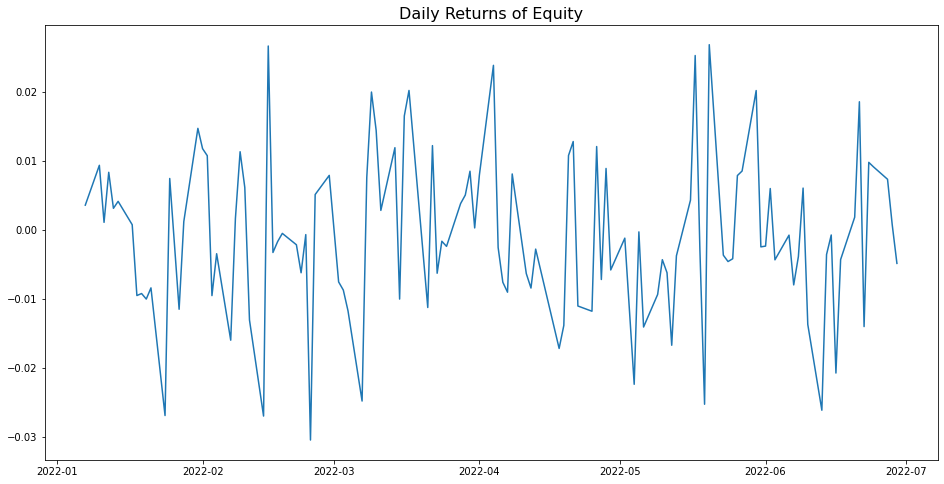

In [29]:
#Let's visualize the returns plots
plt.figure(figsize=(16,8))
plt.title("Daily Returns of Equity",fontsize=16)
p = plt.plot(df["Equity_ret"])

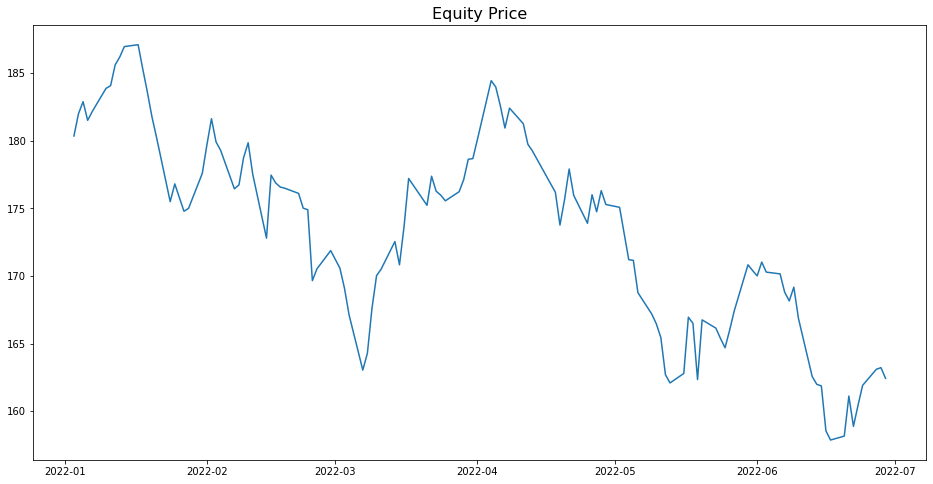

In [38]:
#Let's visualize the returns plots
plt.figure(figsize=(16,8))
plt.title("Equity Price",fontsize=16)
p = plt.plot(equity_df["Equity"])

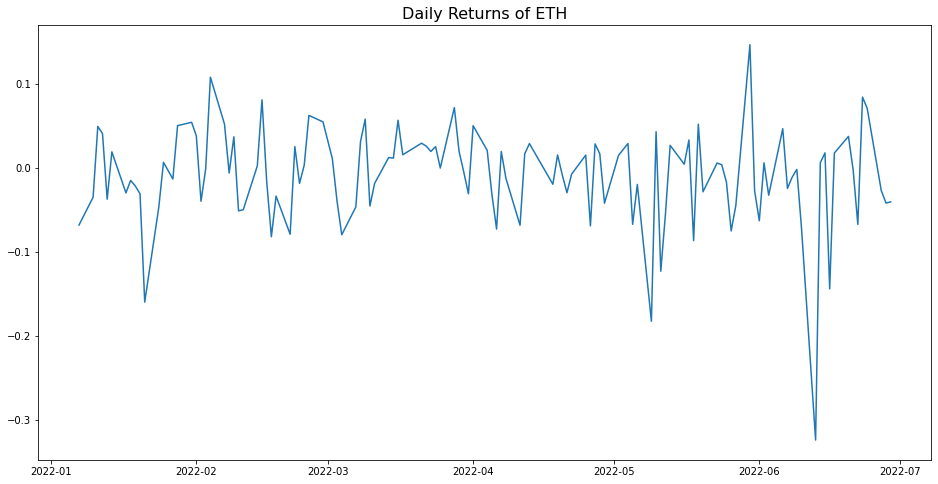

In [35]:
#Let's visualize the returns plots
plt.figure(figsize=(16,8))
plt.title("Daily Returns of ETH",fontsize=16)
p = plt.plot(df["ETH_ret"])

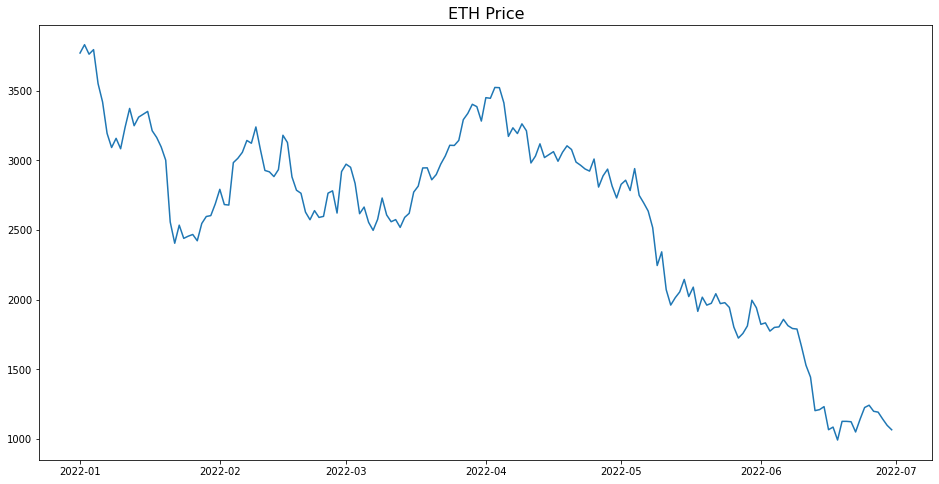

In [37]:
#Let's visualize the returns plots
plt.figure(figsize=(16,8))
plt.title("ETH Price",fontsize=16)
p = plt.plot(eth_df["ETH"])

In [34]:
#Let's compute the  returns for each series
equity_return=df["Equity_ret"].mean()
eth_return=df["ETH_ret"].mean()

print("The ETH average return is ",eth_return)
print("The Equity average return is ",equity_return)

The ETH average return is  -0.00961716461830707
The Equity average return is  -0.000940750500552041


***We can see that the overall return is negative in both the equity etf as well as ETH case. But the return is more negative in case of ETH, which is roughly 10 times smaller than Equity returns.***

In [33]:
#Let's compute the  returns for each series
equity_return=df["Equity_ret"].var()
eth_return=df["ETH_ret"].var()

print("The ETH Variance is ",equity_return)
print("The Equity Variance is ",eth_return)

The ETH Variance is  0.0001391925658914629
The Equity Variance is  0.003484117073156928


In [41]:
#Let's see overall value decrease in these 6 months
eth_change = 100* (eth_df['ETH'][-1]/eth_df['ETH'][0] - 1)

print("The Decrease in ETH value in last 6 month is  ",eth_change,"%")

The Decrease in ETH value in last 6 month is   -71.68741089689125 %


In [42]:
equity_change = 100* (equity_df['Equity'][-1]/equity_df['Equity'][0] - 1)

print("The Decrease in Equity ETF  value in last 6 month is  ",equity_change,"%")

The Decrease in Equity ETF  value in last 6 month is   -9.931243221582765 %


**We can see that Equity price has fallen by roughly 10% and ETH price has fallen by about 71.6% in past 6 months of 2022**

### Returns Comparison

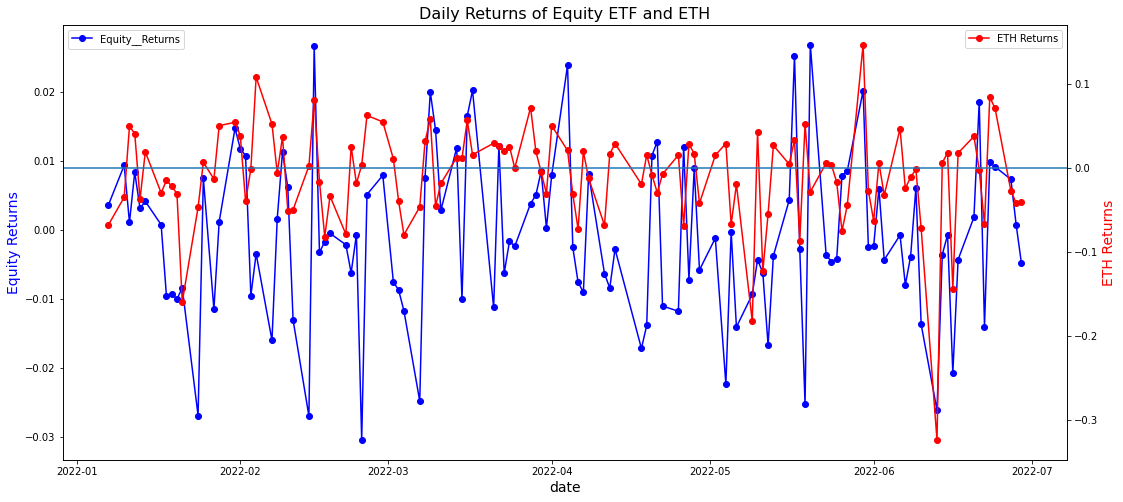

In [47]:
fig,ax = plt.subplots(figsize=(18,8))
# make a plot
ax.plot(df.index, df.Equity_ret, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("Equity Returns",color="blue",fontsize=14)
plt.legend(["Equity__Returns"],loc=2)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.index, df.ETH_ret,color="red",marker="o")
ax2.set_ylabel("ETH Returns",color="red",fontsize=14)
plt.title("Daily Returns of Equity ETF and ETH",fontsize=16)
plt.legend(["ETH Returns"],loc=1)
plt.show()

**Model ETH prediction as Classification Problem**

In [48]:
X = df['Equity_ret']

In [50]:
#Make the prediction of the ETH based on Equity Returns
y = [ 1 if value>0 else 0 for value in df['ETH_ret']]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(pd.DataFrame(X))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

**GradientBoosting Classifier**

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

In [61]:
clf.score(X_test, y_test)

0.5128205128205128

In [64]:
y_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_pred)

In [69]:
results

array([[12,  9],
       [10,  8]])

**Decision Trees**

In [70]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_train, y_train)


DecisionTreeClassifier()

In [71]:
clf2.score(X_test, y_test)

0.5128205128205128

**We can see that we have reached accuracy score of 51.82%, we will try to improve it further with additional approaches in next part!**